In [1]:
#! pip install yfinance


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stocks=input("Enter the code of the stock:")
data=yf.download(stocks,"2008-01-01","2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stock:NG=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [4]:
data.shape


(3282, 5)

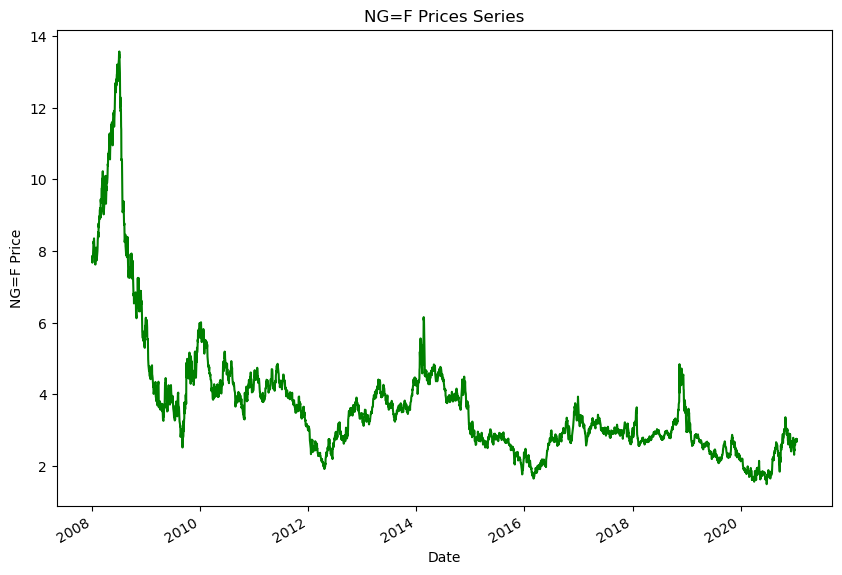

In [5]:
data.Close.plot(figsize=(10,7),color='g')
plt.ylabel("{} Price".format(stocks))
plt.title("{} Prices Series".format(stocks))
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9676\2422862908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

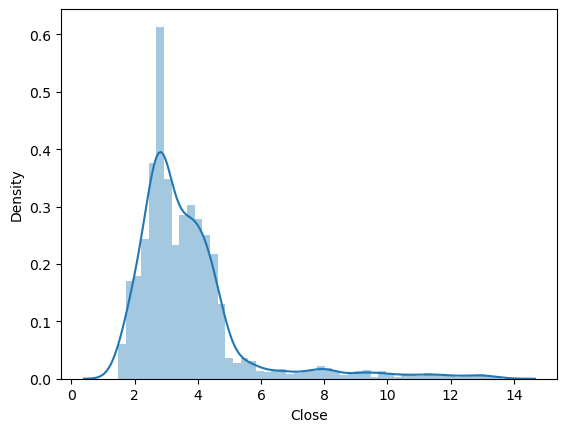

In [6]:
sns.distplot(data["Close"])


In [ ]:
#conclusions
#- Shape of the data
#- how our data is distributed
#- It is very very non linear

In [7]:
x=data.drop("Close", axis=1)
y=data["Close"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)

In [12]:
#r2_square >=1.0 #good model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2score=r2_score(y_test,y_pred)
    print("RMSE", rmse)
    print("R2_SCORE", r2score)

calculate_metrics(y_test,pred1)


RMSE 0.03917354072438055
R2_SCORE 0.9994383299702716


In [13]:
#regularised linear models Ridge and Lasso
#They are less prone to overfitting
from sklearn.linear_model import Lasso, Ridge

la=Lasso().fit(x_train,y_train)
ri=Ridge().fit(x_train, y_train)
la_p=la.predict(x_test)
ri_p= ri.predict(x_test)


In [14]:
calculate_metrics(y_test,la_p)

RMSE 0.48674774021594447
R2_SCORE 0.9132831519010187


In [15]:
#Lasso is not good for this case....But Ridge is performing good
calculate_metrics(y_test,ri_p)

RMSE 0.04018833935311594
R2_SCORE 0.999408852689666


In [ ]:
#SVM (Support Vector machine) works well if we have many features. Here we don't have many features.

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr =SVR()
param_grid={'C':[0.1,1,10,100,1000],
        'gamma':[1,0.1,0.01,0.001,0.0001],
        'kernel':['rbf']}
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   1.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   1.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   1.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   1.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   1.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   1.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   1.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.3s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.006 total time=   1.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   1.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   1.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.012 total time=   1.3s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.002 total time=   1.3s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.008 total time=   1.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr=SVR(C=10,gamma=0.01,kernel='rbf')
svr.fit(x_train,y_train)
svr_pred =svr.predict(x_test)